In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
#carregando o dataframe
heart_dialises = pd.read_csv('C:/Users/janaina/Documents/Mestrado_documentos/QUADRI2_2020/MACHINE_LEARNING/PROJETO1/DATASETS/CORACAO/heart.csv')

In [3]:
#verificando as 10 primeiras linhas do dataframe
heart_dialises.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Análise exploratório dos dados

In [4]:
#contando linhas e colunas tem no dataframe
heart_dialises.shape

(303, 14)

In [5]:
#descrição estatística do dataframe.
heart_dialises.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#checando se há algum dado faltante no dataframe
heart_dialises.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#verificando quais são os tipos de dados constam no dataframe
#verificando tipos de dados do dataframe
heart_dialises.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#contagem de participantes por sexo da pesquisa
heart_dialises['sex'].value_counts()


1    207
0     96
Name: sex, dtype: int64

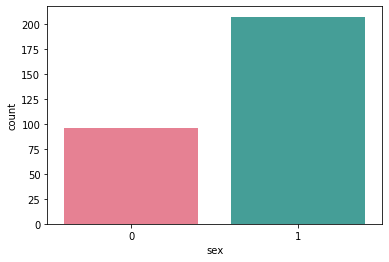

In [9]:
#gráfico de barras 
grafico_por_sexo = sns.countplot('sex',data = heart_dialises,palette="husl")



In [10]:
#ordenando o dataframe

ordenação = heart_dialises.sort_values(by='sex')
ordenação

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [11]:
#média de idade de homens e por mulheres alvos e não alvos de problemas cardiacos.
heart_dialises.groupby(['sex','target']).agg({'age':np.mean})

age
sex target           
0   0       59.041667
    1       54.555556
1   0       56.087719
    1       50.903226

In [12]:
#quantidade de pessoas por sexo que tem ou não tem problema de coração
heart_dialises.groupby(['sex','target']).agg({'target':len})

target
sex target        
0   0           24
    1           72
1   0          114
    1           93

In [13]:
#quantidade de dores no coração por sexo
heart_dialises.groupby(['sex','cp']).agg({'cp':len})

cp
sex cp     
0   0    39
    1    18
    2    35
    3     4
1   0   104
    1    32
    2    52
    3    19

In [14]:
#quantidade de indíviduos por sexo que reclamam de dores no peito ao fazer exercício.
heart_dialises.groupby(['sex','exang']).agg({'exang':len})

exang
sex exang       
0   0         74
    1         22
1   0        130
    1         77

In [15]:
#Resultados dos exames de eletrocardiograma.
heart_dialises.groupby(['sex','restecg']).agg({'restecg':len})

restecg
sex restecg         
0   0             44
    1             49
    2              3
1   0            103
    1            103
    2              1

In [16]:
#depressão de ST induzida por exercício em relação ao repouso
#investigar melhor esse atributo
heart_dialises[heart_dialises['oldpeak']==6.2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In [17]:
#Quantidade de pessoas com colesterol ideal com função groupby
heart_dialises.groupby('sex')['chol'].apply(lambda x: x[x <=200].count())

sex
0    14
1    37
Name: chol, dtype: int64

In [18]:
#Quantidade de pessoas com colesterol ideal
sum(heart_dialises['chol']<=200)

51

In [19]:
#quantidade de mulheres com colesterol até 200
len(heart_dialises[(heart_dialises['chol']<=200) & (heart_dialises['sex']==0)])

14

In [20]:
#quantidade de homens com colesterol até 200
len(heart_dialises[(heart_dialises['chol']<=200) & (heart_dialises['sex']==1)])

37

In [21]:
#Quantidade de pessoas com colesterol entre 200 e 240
           
len(heart_dialises[(heart_dialises['chol']>200) & (heart_dialises['chol']<=241)])

102

In [22]:
#Quantidade de mulheres com colesterol entre 200 e 240
len(heart_dialises[(heart_dialises['chol']>200) & (heart_dialises['chol']<=241) & (heart_dialises['sex']==0)])

26

In [23]:
#Quantidade de mulheres com colesterol entre 200 e 240
len(heart_dialises[(heart_dialises['chol']>200) & (heart_dialises['chol']<=241) & (heart_dialises['sex']==1)])

76

In [24]:
#quantidade de pessoasl com colesterol maior que 240
sum(heart_dialises['chol']>241)

150

In [25]:
heart_dialises.groupby('sex')['chol'].apply(lambda x: x[x >241].count())

sex
0    56
1    94
Name: chol, dtype: int64

In [26]:
#quantidade de mulheres com colesterol maior que 240

len(heart_dialises[(heart_dialises['chol']>241) & (heart_dialises['sex']==0)])

56

In [27]:
#quantidade de homens com colesterol maior que 240

len(heart_dialises[(heart_dialises['chol']>241) & (heart_dialises['sex']==1)])

94

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1400 with 0 Axes>

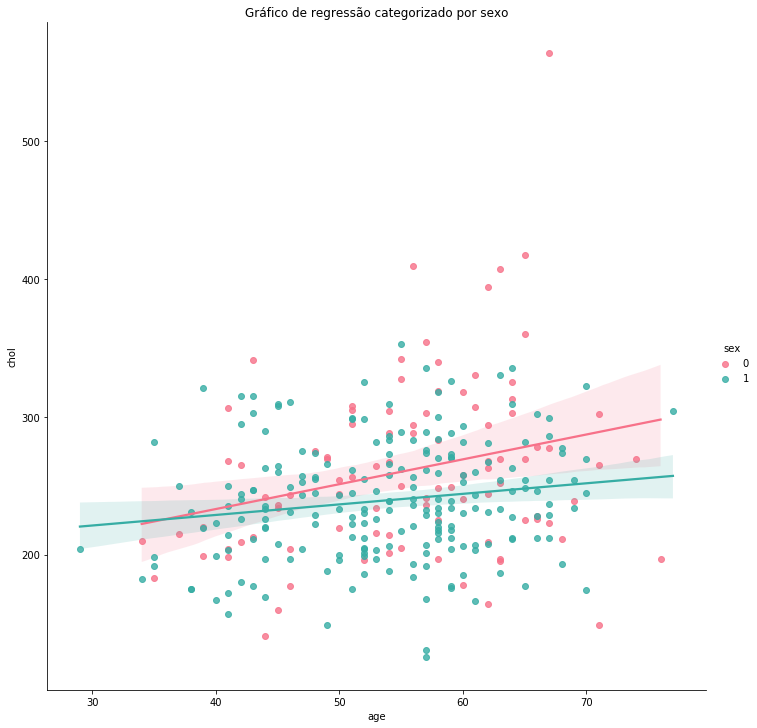

<Figure size 2000x1400 with 0 Axes>

In [62]:
#gráfico de regressão de idade e colesterol entre homens e mulheres.

sns.lmplot(x='age',y='chol',data=heart_dialises,palette='husl',hue='sex',legend=True,size=10)
plt.pyplot.title("Gráfico de regressão categorizado por sexo")



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Gráfico de regressão categorizado por sexo')

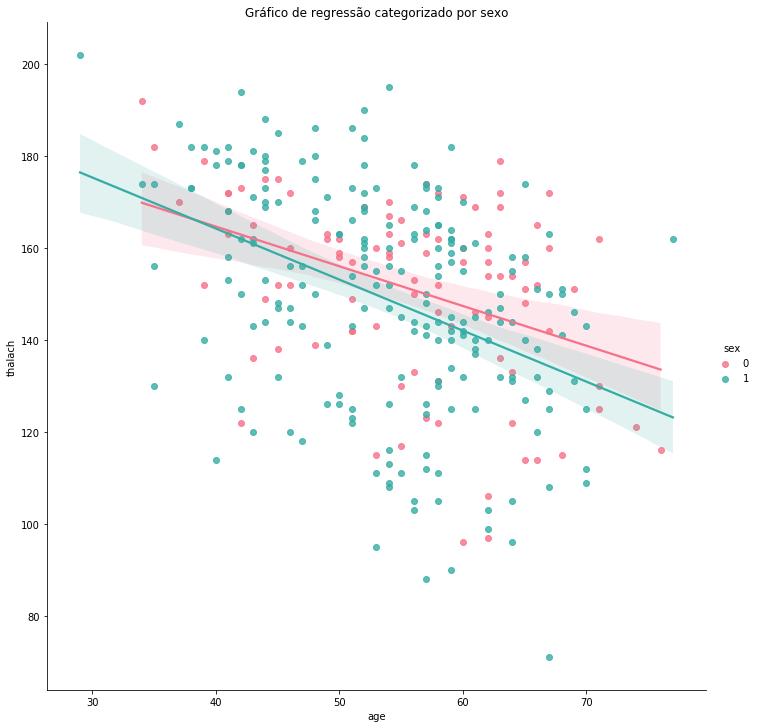

In [67]:
#gráfico de regressão de idade e frequência cardíaca máxima entre homens e mulheres.

sns.lmplot(x='age',y='thalach',data=heart_dialises,palette='husl',hue='sex',legend=True,size=10)
plt.pyplot.title("Gráfico de regressão categorizado por sexo")

In [74]:
heart_dialises.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


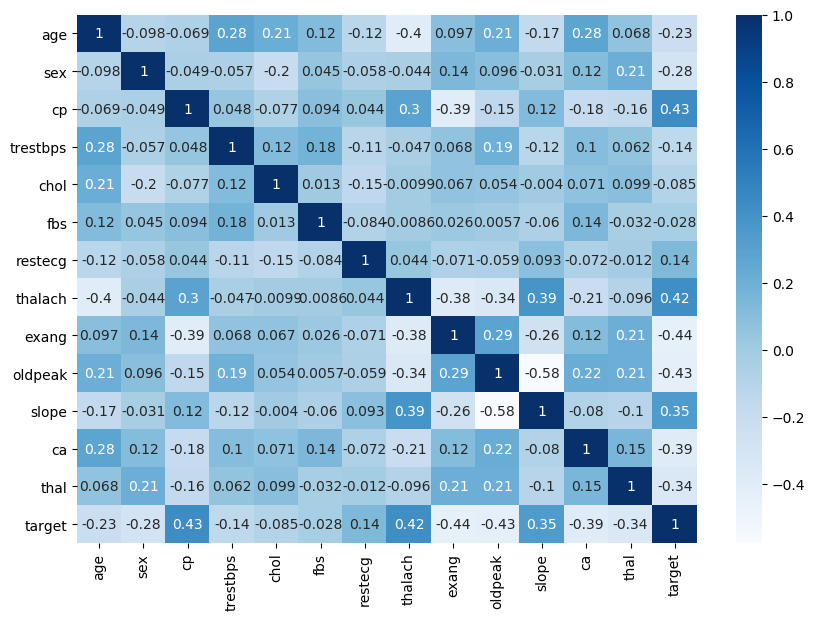

In [42]:
plt.pyplot.figure(figsize=(10,7),dpi=100)
sns.heatmap(heart_dialises.corr(),cmap='Blues',annot=True)

# Decision tree

In [145]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [146]:
#definindo o conjunto de treinamento e o conjunto de teste
#DEFININDO X(TRAINAMENTO) E Y(TESTE)
x = heart_dialises.drop('target',axis= 1)
y = heart_dialises['target']
#dividindo treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [147]:
#tamanho do conjunto de treinamento
len(x_train)

227

In [148]:
#tamanho do conjunto de teste
len(y_test)

76

In [149]:
#definindo um objeto para a classe decision tree
dtc = DecisionTreeClassifier(random_state=42)

In [150]:
#fazendo o fit
clf = dtc.fit(x_train,y_train)

In [151]:
#tirando predições do modelo criado
predicoes = dtc.predict(x_test)

In [152]:
#analisando as medidas de desempenho do modelo
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
print(classification_report(y_test,predicoes))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [154]:
#matriz de confusão
print(confusion_matrix(y_test,predicoes))

[[28  7]
 [ 8 33]]


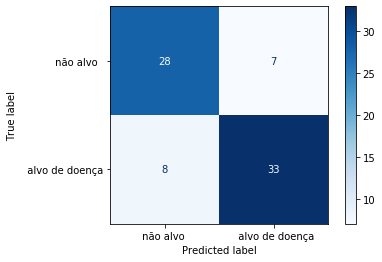

In [155]:
#plotando gráfico
#matriz de confusão
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,x_test,y_test,display_labels=[" não alvo  ","  alvo de doença"],cmap='Blues')



In [156]:
# Calculando a  Accuracy
accuracy_value = metrics.accuracy_score(y_test,predicoes)
accuracy_value

0.8026315789473685

In [157]:
dtc.tree_.node_count

85

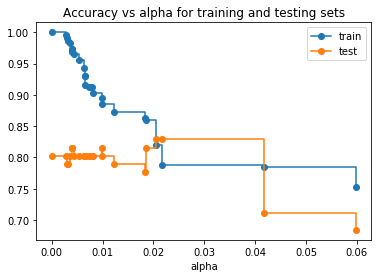

In [158]:
path = dtc.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clfs]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clfs]

fig, ax = plt.pyplot.subplots()
ax.set_xlabel("alpha")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.pyplot.show()

In [159]:
dtc_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=0.03)

In [160]:
dtc_pruned = dtc_pruned.fit(x_train, y_train) 

In [161]:
dtc_pruned.score(x_train, y_train)

0.788546255506608

In [162]:
Score = dtc_pruned.score(x_test, y_test)
print("Decision Tree Accuracy:" , Score)

Decision Tree Accuracy: 0.8289473684210527


In [163]:
dtc_pruned

DecisionTreeClassifier(ccp_alpha=0.03, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [164]:
#utilizando a técnica de validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
dtree2 = DecisionTreeClassifier()
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5
grid = GridSearchCV(dtree2, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

In [165]:
grid.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [166]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [167]:
grid.best_score_


0.7359420289855073

In [168]:
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
best_grid.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
best_grid.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
y_preds = best_grid.predict(x_test)


In [172]:
accuracy_value = metrics.accuracy_score(y_test,y_preds)
accuracy_value

0.8421052631578947

In [173]:
confusion_matrix(y_test,y_preds)


array([[26,  9],
       [ 3, 38]], dtype=int64)

In [174]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.81      0.93      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.85      0.84      0.84        76



In [175]:
best_grid.tree_.node_count

15

In [176]:
grid.score(x_train,y_train)


0.8149779735682819